4 property developer stocks are selected with stock prices from 2018 to 2022 obtained from yfinance and stored in csv. 

In [1]:
import pandas as pd

In [2]:
data_url = 'https://raw.githubusercontent.com/HKBU-DavidLo/stock_analysis/master/data/4stocks.csv'
df = pd.read_csv(data_url)

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2/1/2018,654.599976,656.000000,644.400024,653.400024,498.424286,3135876,BDEV.L
1,3/1/2018,656.200012,656.200012,651.400024,653.000000,498.119171,3210218,BDEV.L
2,4/1/2018,658.200012,658.200012,650.200012,652.200012,497.508911,3558240,BDEV.L
3,5/1/2018,652.200012,661.599976,651.400024,657.799988,501.780731,2918939,BDEV.L
4,8/1/2018,658.599976,658.599976,645.799988,647.400024,493.847443,2971947,BDEV.L


From the table above, it's a typical pre-formatted table that the dataset includes with prices through a day and the trading volume. The last column is the stock label. The first column is the date of stock price. **The first goal is reformat a data set to include the Close prices only of each of the stocks in the "df" dataset in another dataset.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5050 non-null   object 
 1   Open       5050 non-null   float64
 2   High       5050 non-null   float64
 3   Low        5050 non-null   float64
 4   Close      5050 non-null   float64
 5   Adj Close  5050 non-null   float64
 6   Volume     5050 non-null   int64  
 7   Name       5050 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 315.8+ KB


Note that the Dtype of column Date is object

In [5]:
df.Name.unique()

array(['BDEV.L', 'CRST.L', 'PSN.L', 'TW.L'], dtype=object)

In [6]:
df['Name'].unique().shape

(4,)

In [7]:
df[df['Name'] == 'BDEV.L']

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2/1/2018,654.599976,656.000000,644.400024,653.400024,498.424286,3135876,BDEV.L
1,3/1/2018,656.200012,656.200012,651.400024,653.000000,498.119171,3210218,BDEV.L
2,4/1/2018,658.200012,658.200012,650.200012,652.200012,497.508911,3558240,BDEV.L
3,5/1/2018,652.200012,661.599976,651.400024,657.799988,501.780731,2918939,BDEV.L
4,8/1/2018,658.599976,658.599976,645.799988,647.400024,493.847443,2971947,BDEV.L
...,...,...,...,...,...,...,...,...
1258,22/12/2022,408.700012,410.600006,404.299988,405.000000,405.000000,3027702,BDEV.L
1259,23/12/2022,406.299988,410.450012,403.000000,403.700012,403.700012,1127059,BDEV.L
1260,28/12/2022,405.000000,412.700012,403.799988,409.899994,409.899994,1809082,BDEV.L
1261,29/12/2022,408.200012,410.600006,405.000000,409.299988,409.299988,1835819,BDEV.L


In [8]:
bdev = df[df['Name'] =='BDEV.L']
bdev['Close']

0       653.400024
1       653.000000
2       652.200012
3       657.799988
4       647.400024
           ...    
1258    405.000000
1259    403.700012
1260    409.899994
1261    409.299988
1262    396.799988
Name: Close, Length: 1263, dtype: float64

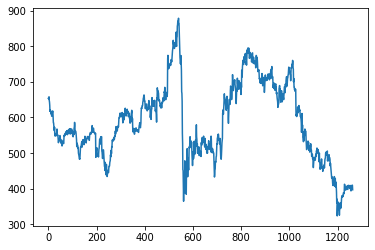

In [9]:
bdev.Close.plot()

In [10]:
# find out the range of dates in the dataset
df['Date'].min(), df['Date'].max()

('1/10/2018', '9/9/2022')

In [11]:
dates = pd.date_range(df['Date'].min(), df['Date'].max())
# pd.date_range: Returns the range of equally spaced time points 
dates

DatetimeIndex(['2018-01-10', '2018-01-11', '2018-01-12', '2018-01-13',
               '2018-01-14', '2018-01-15', '2018-01-16', '2018-01-17',
               '2018-01-18', '2018-01-19',
               ...
               '2022-08-31', '2022-09-01', '2022-09-02', '2022-09-03',
               '2022-09-04', '2022-09-05', '2022-09-06', '2022-09-07',
               '2022-09-08', '2022-09-09'],
              dtype='datetime64[ns]', length=1704, freq='D')

In [12]:
# create empty dataset with column of dates to be as the index
close_prices = pd.DataFrame(index=dates)

In [13]:
close_prices.head()

""
2018-01-10
2018-01-11
2018-01-12
2018-01-13
2018-01-14


In [14]:
symbols = df['Name'].unique()

In [15]:
for symbol in symbols:
  df_sym = df[df['Name'] == symbol]
  df_tmp = pd.DataFrame(data=df_sym['Close'].to_numpy(), \
                        index=pd.to_datetime(df_sym['Date']), columns=[symbol]) # only one column
  close_prices = close_prices.join(df_tmp)

In [16]:
close_prices.head()

,BDEV.L,CRST.L,PSN.L,TW.L
2018-01-10,558.200012,346.399994,2318.0,168.399994
2018-01-11,529.799988,363.399994,2363.0,166.250000
2018-01-12,NaN,NaN,NaN,NaN
2018-01-13,NaN,NaN,NaN,NaN
2018-01-14,NaN,NaN,NaN,NaN


In [17]:
close_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1704 entries, 2018-01-10 to 2022-09-09
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BDEV.L  1180 non-null   float64
 1   CRST.L  1179 non-null   float64
 2   PSN.L   1180 non-null   float64
 3   TW.L    1179 non-null   float64
dtypes: float64(4)
memory usage: 131.1 KB


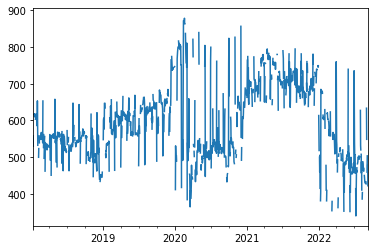

In [18]:
close_prices['BDEV.L'].plot()

There are gaps in the chart since there were no trades in holiday or other reasons of no trades. The next goal is to remove the empty cells that have no trades by dropna and backward fill and forward fill

In [19]:
close_prices.dropna(axis=0, how='all', inplace=True) # delete rows with all nan

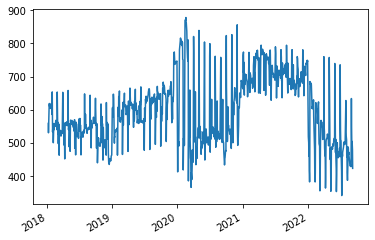

In [20]:
close_prices['BDEV.L'].plot()

In [21]:
close_prices.isna().sum()

BDEV.L    0
CRST.L    1
PSN.L     0
TW.L      1
dtype: int64

In [22]:
close_prices.isna().sum().sum()

2

In [23]:
close_prices.fillna(method='ffill', inplace=True)

In [24]:
close_prices.isna().sum().sum()

0

In [25]:
# since no more missing value, the bfill is not needed
# close_prices.fillna(method='bfill', inplace=True)

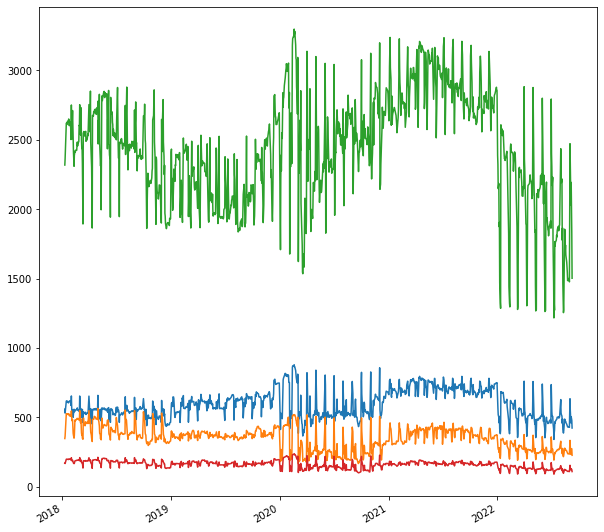

In [26]:
close_prices.plot(legend=False, figsize=(10, 10))

In [27]:
# normalize the stock prices for comparison
close_prices_normalized = close_prices / close_prices.iloc[0] # base point is row 0

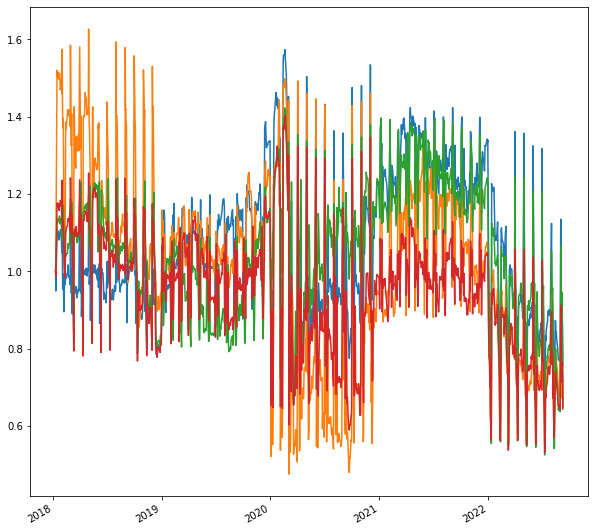

In [28]:
close_prices_normalized.plot(legend=False, figsize=(10, 10))